<a href="https://colab.research.google.com/github/MiguelAngel1401/ComputacionalVision/blob/main/image_reconstruction/BRISK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [ ]:
!unzip /content/stitch.zip

Archive:  /content/stitch.zip
replace STITCH/panoramica.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

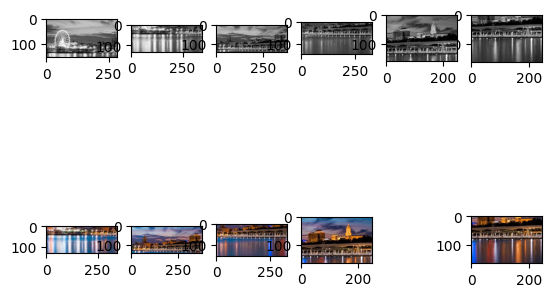

In [ ]:
gray_1 = cv2.imread("STITCH/1.jpg",0)
rgb_1= cv2.cvtColor(cv2.imread("STITCH/1.jpg"), cv2.COLOR_BGR2RGB)
gray_2 = cv2.imread("STITCH/2.jpg",0)
rgb_2= cv2.cvtColor(cv2.imread("STITCH/2.jpg"), cv2.COLOR_BGR2RGB)
gray_3 = cv2.imread("STITCH/3.jpg",0)
rgb_3= cv2.cvtColor(cv2.imread("STITCH/3.jpg"), cv2.COLOR_BGR2RGB)
gray_4 = cv2.imread("STITCH/4.jpg",0)
rgb_4= cv2.cvtColor(cv2.imread("STITCH/4.jpg"), cv2.COLOR_BGR2RGB)
gray_5 = cv2.imread("STITCH/5.jpg",0)
rgb_5= cv2.cvtColor(cv2.imread("STITCH/5.jpg"), cv2.COLOR_BGR2RGB)
gray_6 = cv2.imread("STITCH/6.jpg",0)
rgb_6= cv2.cvtColor(cv2.imread("STITCH/6.jpg"), cv2.COLOR_BGR2RGB)
plt.figure()
plt.subplot(2, 6, 1), plt.imshow(gray_1, cmap="gray")
plt.subplot(2, 6, 6), plt.imshow(rgb_1)
plt.subplot(2, 6, 2), plt.imshow(gray_2, cmap="gray")
plt.subplot(2, 6, 7), plt.imshow(rgb_2)
plt.subplot(2, 6, 3), plt.imshow(gray_3, cmap="gray")
plt.subplot(2, 6, 8), plt.imshow(rgb_3)
plt.subplot(2, 6, 4), plt.imshow(gray_4, cmap="gray")
plt.subplot(2, 6, 9), plt.imshow(rgb_4)
plt.subplot(2, 6, 5), plt.imshow(gray_5, cmap="gray")
plt.subplot(2, 6, 10), plt.imshow(rgb_5)
plt.subplot(2, 6, 6), plt.imshow(gray_6, cmap="gray")
plt.subplot(2, 6, 12), plt.imshow(rgb_6)
plt.show()


#extracción de caracteristicas

In [ ]:
print(cv2.__version__)

4.8.0


In [ ]:

feature_extractor = cv2.BRISK_create()

kp_1, des_1 = feature_extractor.detectAndCompute(gray_1, None)
kp_2, des_2 = feature_extractor.detectAndCompute(gray_2, None)
kp_3, des_3 = feature_extractor.detectAndCompute(gray_3, None)
kp_4, des_4 = feature_extractor.detectAndCompute(gray_4, None)
kp_5, des_5 = feature_extractor.detectAndCompute(gray_5, None)
kp_6, des_6 = feature_extractor.detectAndCompute(gray_6, None)

In [ ]:
print(np.array(kp_1).shape)
print(np.array(des_1).shape)
print(np.array(kp_2).shape)
print(np.array(des_2).shape)
print(np.array(kp_3).shape)
print(np.array(des_3).shape)
print(np.array(kp_4).shape)
print(np.array(des_4).shape)
print(np.array(kp_5).shape)
print(np.array(des_5).shape)
print(np.array(kp_6).shape)
print(np.array(des_6).shape)

(989,)
(989, 64)
(720,)
(720, 64)
(738,)
(738, 64)
(709,)
(709, 64)
(842,)
(842, 64)
(590,)
(590, 64)


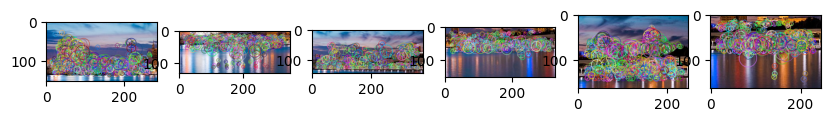

In [ ]:
im_kp_1= cv2.drawKeypoints(rgb_1,kp_1,None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im_kp_2= cv2.drawKeypoints(rgb_2,kp_2,None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im_kp_3= cv2.drawKeypoints(rgb_3,kp_3,None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im_kp_4= cv2.drawKeypoints(rgb_4,kp_4,None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im_kp_5= cv2.drawKeypoints(rgb_5,kp_5,None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im_kp_6= cv2.drawKeypoints(rgb_6,kp_6,None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10,10))
plt.subplot(161),plt.imshow(im_kp_1)
plt.subplot(162),plt.imshow(im_kp_2)
plt.subplot(163),plt.imshow(im_kp_3)
plt.subplot(164),plt.imshow(im_kp_4)
plt.subplot(165),plt.imshow(im_kp_5)
plt.subplot(166),plt.imshow(im_kp_6)
plt.show()

# coincidencia de caracteristicas

In [ ]:
bf = cv2.BFMatcher()
matches_12 = bf.knnMatch(des_1,des_2,k=2)
matches_13 = bf.knnMatch(des_1,des_3,k=2)
matches_34 = bf.knnMatch(des_3,des_4,k=2)
matches_35 = bf.knnMatch(des_3,des_5,k=2)
matches_46 = bf.knnMatch(des_4,des_6,k=2)
print(np.array(matches_12).shape)
print(np.array(matches_13).shape)
print(np.array(matches_34).shape)
print(np.array(matches_35).shape)
print(np.array(matches_46).shape)

(989, 2)
(989, 2)
(738, 2)
(738, 2)
(709, 2)


In [ ]:
good_match_12 = []
for m in matches_12 :
  if m[0].distance/m[1].distance < 0.4:
    good_match_12.append(m)
good_match_arr_12 = np.array(good_match_12)
print(good_match_arr_12.shape)

good_match_13 = []
for m in matches_13 :
  if m[0].distance/m[1].distance < 0.9:
    good_match_13.append(m)
good_match_arr_13 = np.array(good_match_13)
print(good_match_arr_13.shape)

good_match_34 = []
for m in matches_34 :
  if m[0].distance/m[1].distance < 0.5:
    good_match_34.append(m)
good_match_arr_34 = np.array(good_match_34)
print(good_match_arr_34.shape)

good_match_35 = []
for m in matches_35 :
  if m[0].distance/m[1].distance < 0.8:
    good_match_35.append(m)
good_match_arr_35 = np.array(good_match_35)
print(good_match_arr_35.shape)

good_match_46 = []
for m in matches_46 :
  if m[0].distance/m[1].distance < 0.8:
    good_match_46.append(m)
good_match_arr_46 = np.array(good_match_46)
print(good_match_arr_46.shape)

(110, 2)
(139, 2)
(100, 2)
(105, 2)
(62, 2)


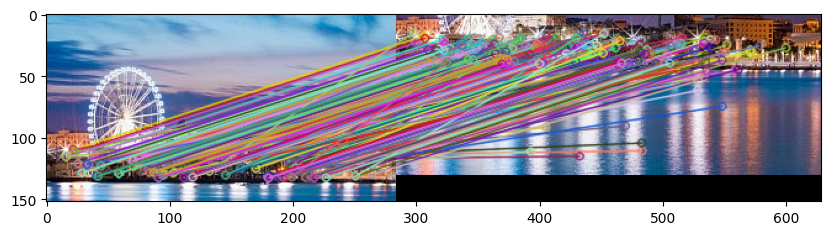

In [ ]:
im_matches = cv2.drawMatchesKnn(rgb_1,kp_1,rgb_2,kp_2,good_match_12,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(10,10))
plt.imshow(im_matches)
plt.show()

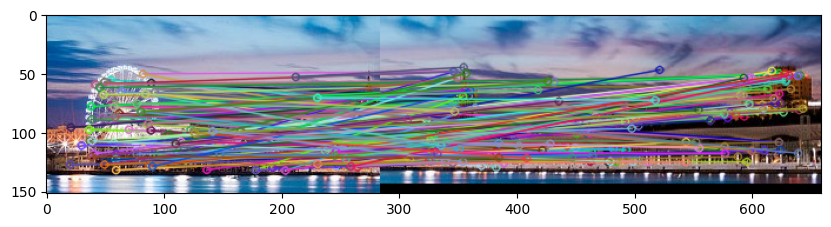

In [ ]:
im_matches = cv2.drawMatchesKnn(rgb_1,kp_1,rgb_3,kp_3,good_match_13,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(10,10))
plt.imshow(im_matches)
plt.show()

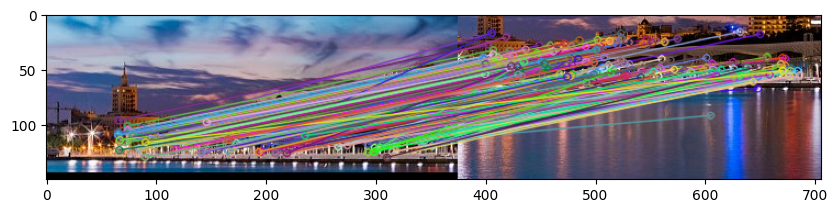

In [ ]:
im_matches = cv2.drawMatchesKnn(rgb_3,kp_3,rgb_4,kp_4,good_match_34,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(10,10))
plt.imshow(im_matches)
plt.show()

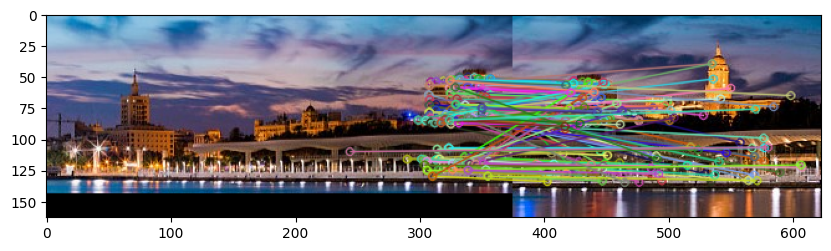

In [ ]:
im_matches = cv2.drawMatchesKnn(rgb_3,kp_3,rgb_5,kp_5,good_match_35,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(10,10))
plt.imshow(im_matches)
plt.show()

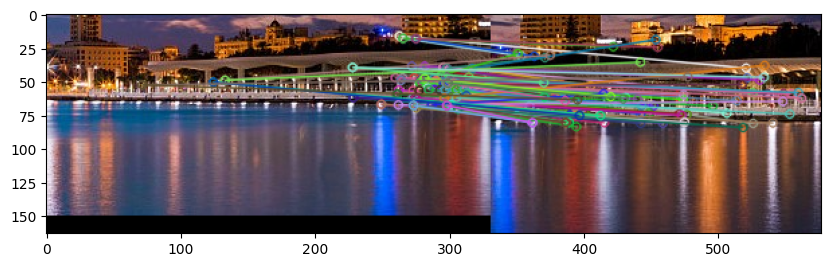

In [ ]:
im_matches = cv2.drawMatchesKnn(rgb_4,kp_4,rgb_6,kp_6,good_match_46,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(10,10))
plt.imshow(im_matches)
plt.show()

#matriz de homografia

In [ ]:
good_kp_1=np.array([kp_1[m.queryIdx].pt for m in good_match_arr_12[:,0]]).reshape(-1,1,2)
good_kp_2=np.array([kp_2[m.trainIdx].pt for m in good_match_arr_12[:,0]]).reshape(-1,1,2)

H21,_ = cv2.findHomography(good_kp_2,good_kp_1, cv2.RANSAC,5.0)
print(H21)

[[ 9.99117549e-01 -3.04179806e-03  1.16534311e-01]
 [-1.00118574e-04  9.96274722e-01  9.20575466e+01]
 [-1.61878251e-06 -1.02995609e-05  1.00000000e+00]]


In [ ]:
good_kp_13=np.array([kp_1[m.queryIdx].pt for m in good_match_arr_13[:,0]]).reshape(-1,1,2)
good_kp_3=np.array([kp_3[m.trainIdx].pt for m in good_match_arr_13[:,0]]).reshape(-1,1,2)

H31,_ = cv2.findHomography(good_kp_3,good_kp_13, cv2.RANSAC,5.0)
print(H31)



[[ 1.15113359e+00  1.30821175e-01  1.99185196e+02]
 [ 2.95263233e-02  1.11338799e+00 -1.54558823e+00]
 [ 3.47021167e-04  4.89025430e-04  1.00000000e+00]]


In [ ]:
good_kp_34=np.array([kp_3[m.queryIdx].pt for m in good_match_arr_34[:,0]]).reshape(-1,1,2)
good_kp_4=np.array([kp_4[m.trainIdx].pt for m in good_match_arr_34[:,0]]).reshape(-1,1,2)

H34,_ = cv2.findHomography(good_kp_4,good_kp_34, cv2.RANSAC,5.0)
print(H34)

[[ 9.97869055e-01 -7.18340053e-04  4.21134204e+01]
 [-7.33031887e-04  9.99537775e-01  6.88619727e+01]
 [-3.74077624e-06 -1.46096594e-05  1.00000000e+00]]


In [ ]:
good_kp_35=np.array([kp_3[m.queryIdx].pt for m in good_match_arr_35[:,0]]).reshape(-1,1,2)
good_kp_5=np.array([kp_5[m.trainIdx].pt for m in good_match_arr_35[:,0]]).reshape(-1,1,2)

H35,_ = cv2.findHomography(good_kp_5,good_kp_35, cv2.RANSAC,5.0)
print(H35)

[[ 1.02525456e+00 -2.32041200e-02  2.83006490e+02]
 [ 9.02068712e-03  9.90174992e-01 -3.92277748e+00]
 [ 8.36257758e-05 -7.35704697e-05  1.00000000e+00]]


In [ ]:
good_kp_46=np.array([kp_4[m.queryIdx].pt for m in good_match_arr_46[:,0]]).reshape(-1,1,2)
good_kp_6=np.array([kp_6[m.trainIdx].pt for m in good_match_arr_46[:,0]]).reshape(-1,1,2)

H46,_ = cv2.findHomography(good_kp_6,good_kp_46, cv2.RANSAC,5.0)
print(H46)

[[ 1.01887870e+00 -2.26439993e-02  2.43046922e+02]
 [ 1.05580883e-03  9.97810574e-01 -1.30118876e+01]
 [ 7.27999506e-05 -7.86560193e-05  1.00000000e+00]]


In [ ]:
H15= np.dot(H31, H35)

In [ ]:
H14= np.dot(H31, H34)

print("Matriz de homografía H14:")
print(H14)

Matriz de homografía H14:
[[1.14783959e+00 1.27023773e-01 2.56671973e+02]
 [2.86530371e-02 1.11287473e+00 7.63679598e+01]
 [3.42182437e-04 4.73940451e-04 1.04828950e+00]]


In [ ]:
H16=np.dot(H14, H46)
print(H16)

[[1.18832912e+00 8.05651897e-02 5.33998033e+02]
 [3.59285359e-02 1.10378255e+00 6.88513915e+01]
 [4.25458210e-04 3.82700135e-04 1.12528903e+00]]


#UNIR IMAGEMES

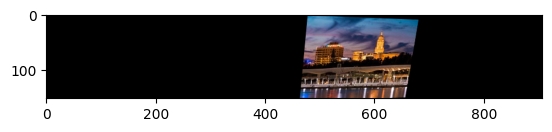

In [ ]:
ancho = rgb_1.shape[1]+ rgb_3.shape[1]+rgb_5.shape[1]
alto = rgb_1.shape[0]
movida5 = cv2.warpPerspective(rgb_5, H15, (ancho, alto))
plt.imshow(movida5)

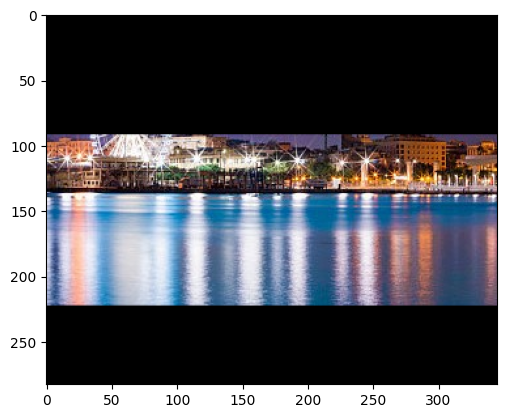

In [ ]:
ancho = rgb_2.shape[1]
alto = rgb_1.shape[0]+ rgb_2.shape[0]

movida1 = cv2.warpPerspective(rgb_2,H21,(ancho,alto))
plt.imshow(movida1)

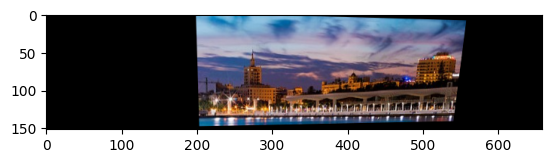

In [ ]:
ancho = rgb_1.shape[1]+ rgb_3.shape[1]
alto = rgb_1.shape[0]

movida2 = cv2.warpPerspective(rgb_3,H31,(ancho,alto))
plt.imshow(movida2)

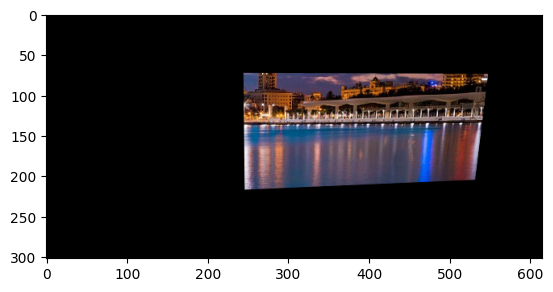

In [ ]:
ancho = rgb_1.shape[1] +rgb_4.shape[1]
alto =  rgb_1.shape[0]+rgb_4.shape[0]

movida3 = cv2.warpPerspective(rgb_4,H14,(ancho,alto))
plt.imshow(movida3)

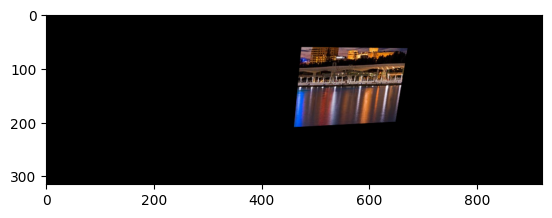

In [ ]:
ancho = rgb_2.shape[1] +rgb_6.shape[1] + rgb_4.shape[1]
alto =  rgb_1.shape[0]+rgb_6.shape[0]

movida6 = cv2.warpPerspective(rgb_6,H16,(ancho,alto))
plt.imshow(movida6)

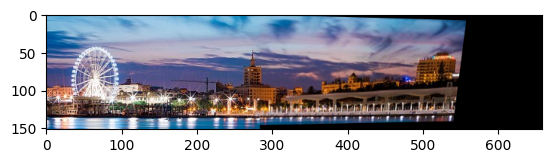

In [ ]:
movida2[:rgb_1.shape[0],:rgb_1.shape[1]]=rgb_1
plt.imshow(movida2)

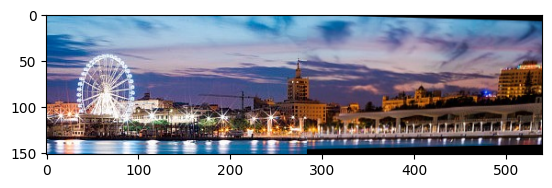

In [ ]:
movida2= movida2[:,:540]
plt.imshow(movida2)

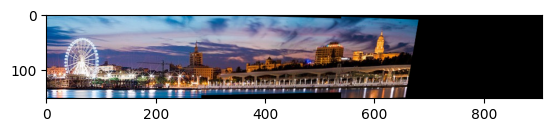

In [ ]:
movida5[:movida2.shape[0],:movida2.shape[1]]=movida2
plt.imshow(movida5)

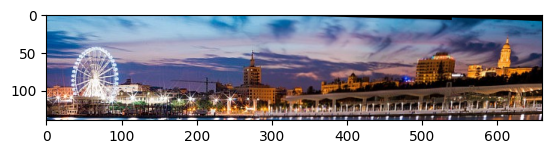

In [ ]:
movida5= movida5[:140,:660]
plt.imshow(movida5)

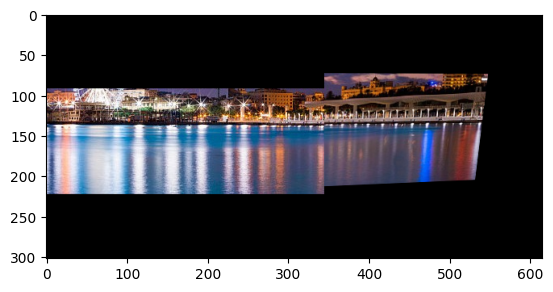

In [ ]:
movida3[:movida1.shape[0],:movida1.shape[1]]=movida1
plt.imshow(movida3)

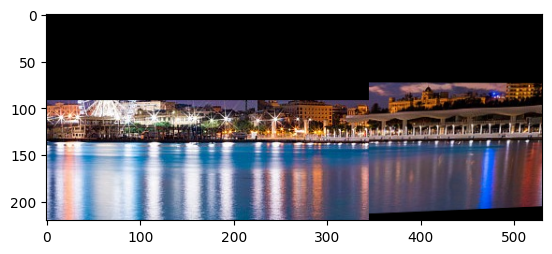

In [ ]:
movida3= movida3[:220,:530]
plt.imshow(movida3)

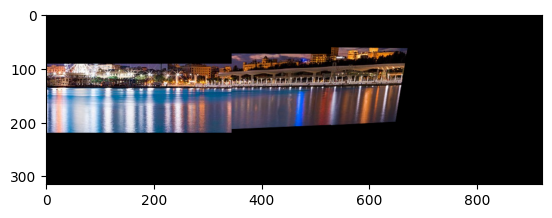

In [ ]:
movida6[:movida3.shape[0],:movida3.shape[1]]=movida3
plt.imshow(movida6)

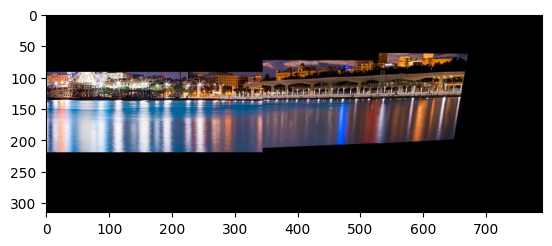

In [ ]:
movida6= movida6[:,:790]
plt.imshow(movida6)

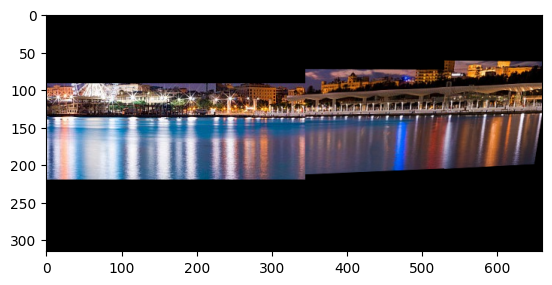

In [ ]:
movida6= movida6[:,:660]
plt.imshow(movida6)

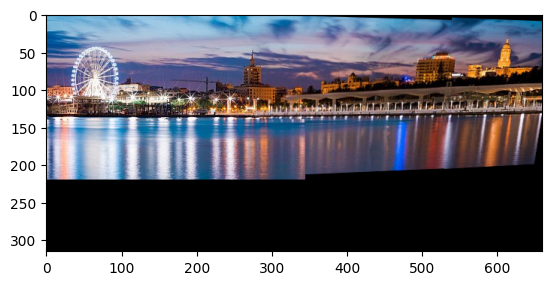

In [ ]:
movida6[:movida5.shape[0],:movida5.shape[1]]=movida5
plt.imshow(movida6)

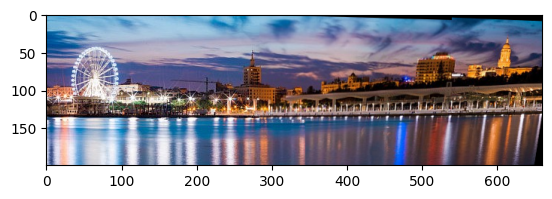

In [ ]:
movida6= movida6[:200,:790]
plt.imshow(movida6)